In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [2]:
labor_df = pd.read_csv('state_data.csv')
labor_df

,State,Sector,Year,Employment (2012=100),Employment (percent change),Hourly labor compensation (2012=100),Hourly labor compensation (percent change),Hourly labor compensation cost ($/hour),Hourly labor compensation cost (percent change),Hours (2012=100),...,Real hourly labor compensation cost ($/hour),Real hourly labor compensation cost (percent change),Real labor compensation (2012=100),Real labor compensation (percent change),Real labor compensation cost (million $),Real labor compensation cost (percent change),Unit labor cost (2012=100),Unit labor cost (percent change),Value of production (million $),Value of production (percent change)
0,Alabama,Private Nonfarm,2007,109.312,NaN,88.207,NaN,25.104,NaN,111.179,...,31.919,NaN,109.487,NaN,100544.415,NaN,97.717,NaN,131017.921,NaN
1,Alabama,Private Nonfarm,2008,105.771,-3.2,92.369,4.7,26.289,4.7,105.856,...,32.176,0.8,105.084,-4.0,96501.227,-4.0,98.359,0.7,132265.709,1.0
2,Alabama,Private Nonfarm,2009,99.487,-5.9,97.805,5.9,27.836,5.9,95.843,...,34.219,6.3,101.187,-3.7,92922.613,-3.7,100.466,2.1,125856.079,-4.8
3,Alabama,Private Nonfarm,2010,99.046,-0.4,99.169,1.4,28.224,1.4,96.281,...,33.961,-0.8,100.882,-0.3,92642.114,-0.3,99.045,-1.4,131441.376,4.4
4,Alabama,Private Nonfarm,2011,98.814,-0.2,101.158,2.0,28.790,2.0,96.638,...,33.666,-0.9,100.377,-0.5,92178.639,-0.5,99.136,0.1,137342.683,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,Wyoming,Private Nonfarm,2015,101.888,-2.5,106.366,0.3,33.236,0.3,99.065,...,33.465,0.6,101.302,-4.0,13946.769,-4.0,102.170,-7.3,29013.577,-6.0
659,Wyoming,Private Nonfarm,2016,97.632,-4.2,108.577,2.1,33.928,2.1,89.967,...,33.936,1.4,93.294,-7.9,12844.237,-7.9,100.301,-1.8,26989.301,-7.0
660,Wyoming,Private Nonfarm,2017,96.781,-0.9,108.974,0.4,34.051,0.4,91.464,...,33.848,-0.3,94.601,1.4,13024.103,1.4,101.756,1.5,28689.195,6.3
661,Wyoming,Private Nonfarm,2018,98.152,1.4,111.702,2.5,34.904,2.5,94.355,...,34.561,2.1,99.648,5.3,13719.076,5.3,107.349,5.5,30169.574,5.2


In [3]:
labor_df.columns

Index(['State', 'Sector', 'Year', 'Employment (2012=100)',
       'Employment (percent change)', 'Hourly labor compensation (2012=100)',
       'Hourly labor compensation (percent change)',
       'Hourly labor compensation cost ($/hour)',
       'Hourly labor compensation cost (percent change)', 'Hours (2012=100)',
       'Hours (percent change)', 'Implicit output deflator (2012=100)',
       'Implicit output deflator (percent change)',
       'Labor compensation (2012=100)', 'Labor compensation (percent change)',
       'Labor compensation cost (million $)',
       'Labor compensation cost (percent change)',
       'Labor productivity (2012=100)', 'Labor productivity (percent change)',
       'Number of employees (percent change)',
       'Number of employees (thousands)', 'Number of hours (millions)',
       'Number of hours (percent change)', 'Output (2012=100)',
       'Output (percent change)', 'Output per employee (2012=100)',
       'Output per employee (percent change)',
     

## Compare Real Hourly Labor Compensation Cost ($/hour) across the US
Look at average compensation per state over the last 5 years

LOWEST 5 STATES COMPENSATION COST
-----------------------
Hawaii: $29.65 per hour
Maine: $31.46 per hour
Mississippi: $31.89 per hour
Montana: $31.98 per hour
Vermont: $31.99 per hour


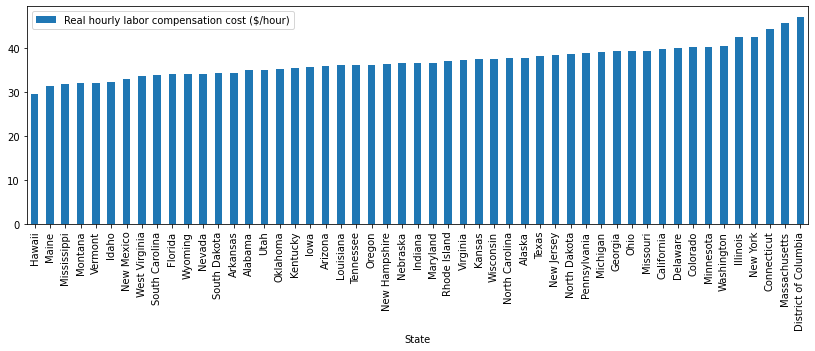

In [5]:
# Narrow down our columns and get last 5 years
five_list = [2015, 2016, 2017, 2018, 2019]
hourly_comp_data = labor_df.loc[labor_df['Year'].isin(five_list),[
    'State',
    'Year', 
    'Real hourly labor compensation cost ($/hour)',
    'Real hourly labor compensation (percent change)',
    'Hourly labor compensation cost ($/hour)',
    'Hourly labor compensation cost (percent change)']]
# Group by state and get the averages; then plot for comparison
avg_comp = hourly_comp_data.groupby('State').mean()
avg_comp_sorted = avg_comp.sort_values(['Real hourly labor compensation cost ($/hour)'])
avg_comp_sorted.plot(kind="bar", y=['Real hourly labor compensation cost ($/hour)'], figsize=(14,4))

# Print out the lowest 5 for visibility
lowest_comps = avg_comp_sorted.iloc[0:5,:]
print("LOWEST 5 STATES COMPENSATION COST\n-----------------------")
for index,row in lowest_comps.iterrows():
    print(f"{index}: ${round(row['Real hourly labor compensation cost ($/hour)'],2)} per hour")

## Compare Labor Productivity across the US
Look at average productivity per state over the last 5 years

HIGHEST 5 STATES LABOR PRODUCTIVITY
-----------------------
Colorado: 110.91
Oklahoma: 110.68
Kansas: 109.71
Washington: 109.58
Hawaii: 109.06


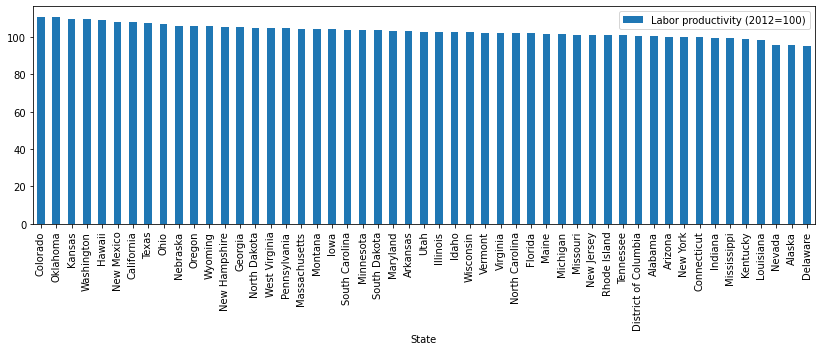

In [6]:
# Narrow down our columns and get last 5 years
five_list = [2015, 2016, 2017, 2018, 2019]
labor_prod_data = labor_df.loc[labor_df['Year'].isin(five_list),[
    'State',
    'Year', 
    'Labor productivity (2012=100)']]
# Group by state and get the averages; then plot for comparison
avg_prod = labor_prod_data.groupby('State').mean()
avg_prod_sorted = avg_prod.sort_values(['Labor productivity (2012=100)'], ascending=False)
avg_prod_sorted.plot(kind="bar", y=['Labor productivity (2012=100)'], figsize=(14,4))

# Print out the highest 5 for visibility
highest_prod = avg_prod_sorted.iloc[0:5,:]
print("HIGHEST 5 STATES LABOR PRODUCTIVITY\n-----------------------")
for index,row in highest_prod.iterrows():
    print(f"{index}: {round(row['Labor productivity (2012=100)'],2)}")

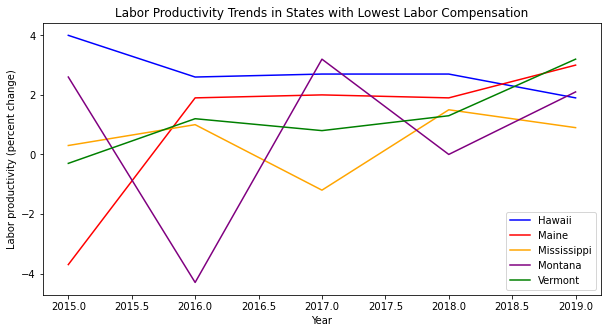

In [6]:
prod_df = labor_df.loc[labor_df['Year'].isin(five_list),[
    'State',
    'Year',
    'Labor productivity (percent change)'
]]
lowest_comp_list = []
for index, row in lowest_comps.iterrows():
    lowest_comp_list.append(index)
prod_df = prod_df.loc[prod_df['State'].isin(lowest_comp_list),:]
years = prod_df['Year'].unique()
plt.figure(figsize=(10,5))
state1, = plt.plot(years, prod_df.loc[prod_df['State'] == lowest_comp_list[0],'Labor productivity (percent change)'],
                  color = 'blue', label = lowest_comp_list[0])
state2, = plt.plot(years, prod_df.loc[prod_df['State'] == lowest_comp_list[1],'Labor productivity (percent change)'],
                  color = 'red', label = lowest_comp_list[1])
state3, = plt.plot(years, prod_df.loc[prod_df['State'] == lowest_comp_list[2],'Labor productivity (percent change)'],
                  color = 'orange', label = lowest_comp_list[2])
state4, = plt.plot(years, prod_df.loc[prod_df['State'] == lowest_comp_list[3],'Labor productivity (percent change)'],
                  color = 'purple', label = lowest_comp_list[3])
state5, = plt.plot(years, prod_df.loc[prod_df['State'] == lowest_comp_list[4],'Labor productivity (percent change)'],
                  color = 'green', label = lowest_comp_list[4])


plt.legend(handles=[state1, state2, state3, state4, state5], loc='best')
plt.title('Labor Productivity Trends in States with Lowest Labor Compensation')
plt.xlabel('Year')
plt.ylabel('Labor productivity (percent change)')
plt.show()


HIGHEST 5 STATES PRODUCTIVITY 
 -----------------------
Hawaii: 2.7800000000000002
California: 2.32
Oregon: 2.12
Colorado: 2.02
Washington: 1.86


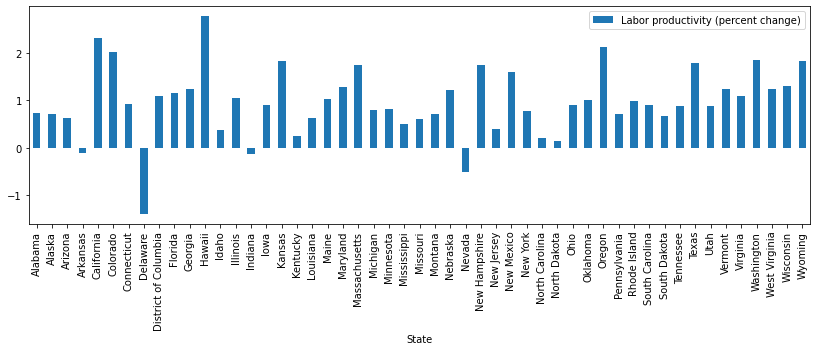

In [7]:
# Narrow down our columns and get last 5 years
Productivity_percentchange = labor_df.loc[labor_df['Year'].isin(five_list),[
    'State',
    'Year', 
    'Labor productivity (percent change)',
    'Number of employees (percent change)']]
# Group by state and get the averages; then plot for comparison
prod_avg_comp = Productivity_percentchange.groupby('State').mean()
prod_avg_comp.plot(kind="bar", y=['Labor productivity (percent change)'], figsize=(14,4))
# Print out the lowest 3 for visibility
prod_avg_comp_sorted = prod_avg_comp.sort_values(['Labor productivity (percent change)'], ascending = False)
highest_prod_comps = prod_avg_comp_sorted.iloc[0:5,:]
print("HIGHEST 5 STATES PRODUCTIVITY \n -----------------------")
highlist = []
for index,row in highest_prod_comps.iterrows():
    print(f"{index}: {row['Labor productivity (percent change)']}")
    highlist.append(index)

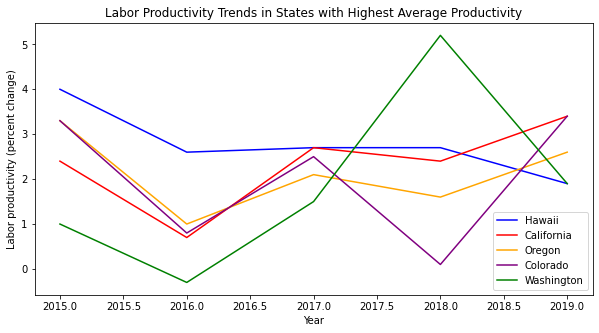

In [8]:
prod_high_df = labor_df.loc[labor_df['Year'].isin(five_list),[
    'State',
    'Year',
    'Labor productivity (percent change)'
]]

prod_high_df = prod_high_df.loc[prod_high_df['State'].isin(highlist),:]
years = prod_high_df['Year'].unique()
plt.figure(figsize=(10,5))
state1high, = plt.plot(years, prod_high_df.loc[prod_high_df['State'] == highlist[0],'Labor productivity (percent change)'],
                  color = 'blue', label = highlist[0])
state2high, = plt.plot(years, prod_high_df.loc[prod_high_df['State'] == highlist[1],'Labor productivity (percent change)'],
                  color = 'red', label = highlist[1])
state3high, = plt.plot(years, prod_high_df.loc[prod_high_df['State'] == highlist[2],'Labor productivity (percent change)'],
                  color = 'orange', label = highlist[2])
state4high, = plt.plot(years, prod_high_df.loc[prod_high_df['State'] == highlist[3],'Labor productivity (percent change)'],
                  color = 'purple', label = highlist[3])
state5high, = plt.plot(years, prod_high_df.loc[prod_high_df['State'] == highlist[4],'Labor productivity (percent change)'],
                  color = 'green', label = highlist[4])

plt.legend(handles=[state1high, state2high, state3high, state4high, state5high], loc='best')
plt.title('Labor Productivity Trends in States with Highest Average Productivity')
plt.xlabel('Year')
plt.ylabel('Labor productivity (percent change)')
plt.show()

In [9]:
df = labor_df[[
    'State', 
    'Year', 
    'Number of employees (thousands)', 
    'Number of hours (millions)', 
    'Real hourly labor compensation cost ($/hour)',
    'Output (2012=100)',
    'Output (percent change)',
    'Number of hours (percent change)',
    'Unit labor cost (2012=100)',
    'Labor productivity (2012=100)',
    'Labor productivity (percent change)',
    'Real hourly labor compensation (percent change)'
]]
df_productivity = labor_df[[
    'State',
    'Year',
    'Real hourly labor compensation cost ($/hour)',
    'Labor productivity (percent change)'
]]


In [10]:
df['Number of hours (millions)'] =  df['Number of hours (millions)'] *1000000
df['Number of employees (thousands)'] = df['Number of employees (thousands)']*1000
df

,State,Year,Number of employees (thousands),Number of hours (millions),Real hourly labor compensation cost ($/hour),Output (2012=100),Output (percent change),Number of hours (percent change),Unit labor cost (2012=100),Labor productivity (2012=100),Labor productivity (percent change),Real hourly labor compensation (percent change)
0,Alabama,2007,1786531.0,3.150003e+09,31.919,100.359,NaN,NaN,97.717,90.268,NaN,NaN
1,Alabama,2008,1728658.0,2.999170e+09,32.176,99.409,-0.9,-4.8,98.359,93.910,4.0,0.8
2,Alabama,2009,1625955.0,2.715493e+09,34.219,93.305,-6.1,-9.5,100.466,97.352,3.7,6.4
3,Alabama,2010,1618753.0,2.727896e+09,33.961,96.402,3.3,0.5,99.045,100.125,2.8,-0.8
4,Alabama,2011,1614951.0,2.738000e+09,33.666,98.609,2.3,0.4,99.136,102.040,1.9,-0.9
...,...,...,...,...,...,...,...,...,...,...,...,...
658,Wyoming,2015,244891.0,4.167630e+08,33.465,103.133,3.2,-4.6,102.170,104.106,8.2,0.6
659,Wyoming,2016,234662.0,3.784870e+08,33.936,97.391,-5.6,-9.2,100.301,108.252,4.0,1.4
660,Wyoming,2017,232617.0,3.847840e+08,33.848,97.952,0.6,1.7,101.756,107.093,-1.1,-0.3
661,Wyoming,2018,235912.0,3.969470e+08,34.561,98.181,0.2,3.2,107.349,104.055,-2.8,2.1


In [11]:
df['hours per employee'] = df['Number of hours (millions)']/df['Number of employees (thousands)']
df

,State,Year,Number of employees (thousands),Number of hours (millions),Real hourly labor compensation cost ($/hour),Output (2012=100),Output (percent change),Number of hours (percent change),Unit labor cost (2012=100),Labor productivity (2012=100),Labor productivity (percent change),Real hourly labor compensation (percent change),hours per employee
0,Alabama,2007,1786531.0,3.150003e+09,31.919,100.359,NaN,NaN,97.717,90.268,NaN,NaN,1763.195265
1,Alabama,2008,1728658.0,2.999170e+09,32.176,99.409,-0.9,-4.8,98.359,93.910,4.0,0.8,1734.970133
2,Alabama,2009,1625955.0,2.715493e+09,34.219,93.305,-6.1,-9.5,100.466,97.352,3.7,6.4,1670.091116
3,Alabama,2010,1618753.0,2.727896e+09,33.961,96.402,3.3,0.5,99.045,100.125,2.8,-0.8,1685.183595
4,Alabama,2011,1614951.0,2.738000e+09,33.666,98.609,2.3,0.4,99.136,102.040,1.9,-0.9,1695.407477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,Wyoming,2015,244891.0,4.167630e+08,33.465,103.133,3.2,-4.6,102.170,104.106,8.2,0.6,1701.830610
659,Wyoming,2016,234662.0,3.784870e+08,33.936,97.391,-5.6,-9.2,100.301,108.252,4.0,1.4,1612.902813
660,Wyoming,2017,232617.0,3.847840e+08,33.848,97.952,0.6,1.7,101.756,107.093,-1.1,-0.3,1654.152534
661,Wyoming,2018,235912.0,3.969470e+08,34.561,98.181,0.2,3.2,107.349,104.055,-2.8,2.1,1682.606226


In [12]:
df['avg sal'] = df['hours per employee']* df['Real hourly labor compensation cost ($/hour)']
df.head(20)

,State,Year,Number of employees (thousands),Number of hours (millions),Real hourly labor compensation cost ($/hour),Output (2012=100),Output (percent change),Number of hours (percent change),Unit labor cost (2012=100),Labor productivity (2012=100),Labor productivity (percent change),Real hourly labor compensation (percent change),hours per employee,avg sal
0,Alabama,2007,1786531.0,3.150003e+09,31.919,100.359,NaN,NaN,97.717,90.268,NaN,NaN,1763.195265,56279.429664
1,Alabama,2008,1728658.0,2.999170e+09,32.176,99.409,-0.9,-4.8,98.359,93.910,4.0,0.8,1734.970133,55824.398996
2,Alabama,2009,1625955.0,2.715493e+09,34.219,93.305,-6.1,-9.5,100.466,97.352,3.7,6.4,1670.091116,57148.847888
3,Alabama,2010,1618753.0,2.727896e+09,33.961,96.402,3.3,0.5,99.045,100.125,2.8,-0.8,1685.183595,57230.520071
4,Alabama,2011,1614951.0,2.738000e+09,33.666,98.609,2.3,0.4,99.136,102.040,1.9,-0.9,1695.407477,57077.588113
5,Alabama,2012,1634341.0,2.833265e+09,32.412,100.000,1.4,3.5,100.000,100.000,-2.0,-3.7,1733.582527,56188.876850
6,Alabama,2013,1655304.0,2.880841e+09,32.396,101.096,1.1,1.7,101.667,99.426,-0.6,0.0,1740.369745,56381.018252
7,Alabama,2014,1667981.0,2.849260e+09,33.573,100.662,-0.4,-1.1,105.581,100.097,0.7,3.6,1708.208906,57349.697616
8,Alabama,2015,1689977.0,2.897888e+09,34.508,102.024,1.4,1.7,108.703,99.748,-0.3,2.8,1714.749964,59172.591760
9,Alabama,2016,1724261.0,2.965176e+09,34.599,103.104,1.1,2.3,110.761,98.518,-1.2,0.3,1719.679329,59499.185114


In [13]:
df.describe()

,Year,Number of employees (thousands),Number of hours (millions),Real hourly labor compensation cost ($/hour),Output (2012=100),Output (percent change),Number of hours (percent change),Unit labor cost (2012=100),Labor productivity (2012=100),Labor productivity (percent change),Real hourly labor compensation (percent change),hours per employee,avg sal
count,663.000000,6.630000e+02,6.630000e+02,663.000000,663.000000,612.000000,612.000000,663.000000,663.000000,612.000000,612.000000,663.000000,663.000000
mean,2013.000000,2.490072e+06,4.140016e+09,35.765291,103.071946,1.530392,0.449837,102.617781,100.031308,1.102614,0.785784,1657.791049,59267.710657
std,3.744482,2.755625e+06,4.613352e+09,3.726890,9.004079,3.051257,2.962474,6.713907,4.966529,2.394851,1.723509,44.080258,6117.776707
min,2007.000000,2.323210e+05,3.784870e+08,26.681000,57.490000,-10.500000,-13.800000,81.591000,74.610000,-6.600000,-5.100000,1517.572161,44471.117404
25%,2010.000000,6.178380e+05,1.021459e+09,33.146000,97.734500,0.300000,-0.300000,97.588500,97.684000,-0.300000,-0.425000,1626.818021,55460.895613
50%,2013.000000,1.634341e+06,2.734767e+09,35.502000,101.211000,2.000000,1.000000,101.294000,100.000000,1.000000,0.800000,1656.846540,59221.471759
75%,2016.000000,3.120074e+06,5.041183e+09,37.869500,107.889500,3.200000,2.100000,107.426500,102.621500,2.400000,1.900000,1685.902203,62545.166476
max,2019.000000,1.658088e+07,2.754064e+10,47.965000,137.166000,23.500000,12.300000,123.234000,115.321000,13.800000,9.500000,1815.300807,81271.249045


The correlation between both factors is 0.41


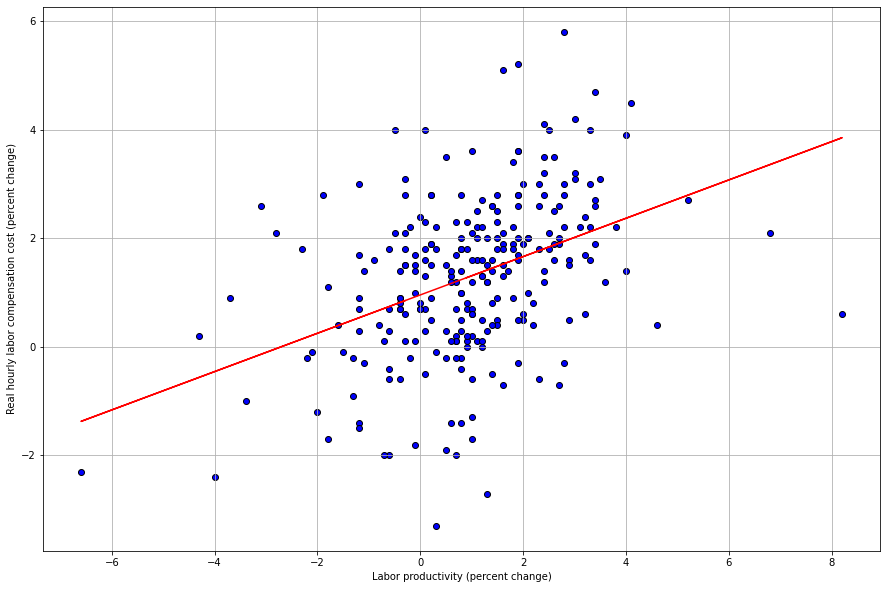

In [23]:
five_list = [2015, 2016, 2017, 2018, 2019]
five_df = labor_df[labor_df['Year'].isin(five_list)]
five_df_labor = five_df[[
    'State',
    'Year',
    'Labor productivity (percent change)',
#     'hours per employee',
    'Real hourly labor compensation cost (percent change)'
]]
# five_df_labor['hours per employee (percent change)'] = ''
# first = True
# count = 0

# Tried to get the percent change of hours per employee so we have an idea of productivity vs 
# hours per employeee percent change vs compensation percent change, but this didn't work and I'm not sure why
# for index, row in five_df_labor.iterrows():
#     if first == True:
#         first == False
#         print(row.loc[index, 'State'])
#         prev_state = row.loc[count, 'State']
#         prev_hour = row.loc[count, 'hours per employee']
#     elif prev_state == row.loc[count, 'State']:
#         row.loc[count, 'hours per employee (percent change)'] = prev_hour / row.loc[count, 'hours per employee']
#         prev_hour = row.loc[count, 'hours per employee']
#     elif prev_state != row.loc[count, 'State']:
#         prev_state = row.loc[count, 'State']
#         prev_hour = row.loc[count, 'hours per employee']
#     count += 1

plt.figure(figsize= (15, 10))
laborpro = five_df_labor['Labor productivity (percent change)']
laborcomp = five_df_labor['Real hourly labor compensation cost (percent change)']
plt.scatter(laborpro, laborcomp, c='blue', edgecolors = 'black')
plt.xlabel('Labor productivity (percent change)')
plt.ylabel('Real hourly labor compensation cost (percent change)')
slope, intercept, rvalue, pvalue, stderr = linregress(laborpro, laborcomp)
regress = laborpro * slope + intercept
plt.plot(laborpro, regress, 'r-')
plt.grid()

correlation = st.pearsonr(laborpro, laborcomp)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# laborperc, = plt.scatter(years, five_df_labor['Labor productivity (percent change)'],
#                     c='red', edgecolors = 'black')
# plt.legend(handles=[compperc, laborperc], loc='best')
# plt.show

In [15]:
low = df.loc[df['avg sal'] < 50000,:]
low

,State,Year,Number of employees (thousands),Number of hours (millions),Real hourly labor compensation cost ($/hour),Output (2012=100),Output (percent change),Number of hours (percent change),Unit labor cost (2012=100),Labor productivity (2012=100),Labor productivity (percent change),Real hourly labor compensation (percent change),hours per employee,avg sal
143,Hawaii,2007,560356.0,8.898420e+08,28.023,98.320,NaN,NaN,95.720,97.980,NaN,NaN,1587.994061,44500.357569
144,Hawaii,2008,554102.0,8.852080e+08,27.837,97.565,-0.8,-0.5,99.021,97.737,-0.2,-0.7,1597.554241,44471.117404
145,Hawaii,2009,518994.0,8.216030e+08,28.448,92.181,-5.5,-7.2,98.246,99.492,1.8,2.2,1583.068398,45035.129778
146,Hawaii,2010,512778.0,8.274210e+08,28.202,95.176,3.2,0.7,96.699,102.003,2.5,-0.9,1613.604718,45506.880252
147,Hawaii,2011,514282.0,8.396570e+08,27.700,97.093,2.0,1.5,97.188,102.541,0.5,-1.8,1632.678180,45225.185599
148,Hawaii,2012,534334.0,8.867700e+08,26.985,100.000,3.0,5.6,100.000,100.000,-2.5,-2.6,1659.579963,44783.765304
149,Hawaii,2013,542809.0,8.803850e+08,27.617,102.193,2.2,-0.7,101.325,102.934,2.9,2.3,1621.905680,44792.169152
150,Hawaii,2014,556197.0,9.137940e+08,27.430,102.711,0.5,3.8,105.782,99.673,-3.2,-0.7,1642.932270,45065.632177
151,Hawaii,2015,562941.0,9.166630e+08,28.511,107.104,4.3,0.3,106.660,103.611,4.0,3.9,1628.346487,46425.786704
152,Hawaii,2016,571964.0,9.147670e+08,29.504,109.612,2.3,-0.2,108.630,106.258,2.6,3.5,1599.343665,47187.035492


In [16]:
oregon = df.loc[df['State'] == 'Hawaii',:]
oregon

,State,Year,Number of employees (thousands),Number of hours (millions),Real hourly labor compensation cost ($/hour),Output (2012=100),Output (percent change),Number of hours (percent change),Unit labor cost (2012=100),Labor productivity (2012=100),Labor productivity (percent change),Real hourly labor compensation (percent change),hours per employee,avg sal
143,Hawaii,2007,560356.0,889842000.0,28.023,98.320,NaN,NaN,95.720,97.980,NaN,NaN,1587.994061,44500.357569
144,Hawaii,2008,554102.0,885208000.0,27.837,97.565,-0.8,-0.5,99.021,97.737,-0.2,-0.7,1597.554241,44471.117404
145,Hawaii,2009,518994.0,821603000.0,28.448,92.181,-5.5,-7.2,98.246,99.492,1.8,2.2,1583.068398,45035.129778
146,Hawaii,2010,512778.0,827421000.0,28.202,95.176,3.2,0.7,96.699,102.003,2.5,-0.9,1613.604718,45506.880252
147,Hawaii,2011,514282.0,839657000.0,27.700,97.093,2.0,1.5,97.188,102.541,0.5,-1.8,1632.678180,45225.185599
148,Hawaii,2012,534334.0,886770000.0,26.985,100.000,3.0,5.6,100.000,100.000,-2.5,-2.6,1659.579963,44783.765304
149,Hawaii,2013,542809.0,880385000.0,27.617,102.193,2.2,-0.7,101.325,102.934,2.9,2.3,1621.905680,44792.169152
150,Hawaii,2014,556197.0,913794000.0,27.430,102.711,0.5,3.8,105.782,99.673,-3.2,-0.7,1642.932270,45065.632177
151,Hawaii,2015,562941.0,916663000.0,28.511,107.104,4.3,0.3,106.660,103.611,4.0,3.9,1628.346487,46425.786704
152,Hawaii,2016,571964.0,914767000.0,29.504,109.612,2.3,-0.2,108.630,106.258,2.6,3.5,1599.343665,47187.035492


In [17]:
high = df.loc[df['avg sal'] > 70000,:]
highsort =high.sort_values(['avg sal', 'Output (2012=100)'], ascending = False)
highsort.dtypes

State                                               object
Year                                                 int64
Number of employees (thousands)                    float64
Number of hours (millions)                         float64
Real hourly labor compensation cost ($/hour)       float64
Output (2012=100)                                  float64
Output (percent change)                            float64
Number of hours (percent change)                   float64
Unit labor cost (2012=100)                         float64
Labor productivity (2012=100)                      float64
Labor productivity (percent change)                float64
Real hourly labor compensation (percent change)    float64
hours per employee                                 float64
avg sal                                            float64
dtype: object

In [18]:
five_list = [2014, 2015, 2016, 2017, 2018, 2019]
five_df = df[df['Year'].isin(five_list)]
five_df.sort_values('Number of employees (thousands)', ascending = False)


,State,Year,Number of employees (thousands),Number of hours (millions),Real hourly labor compensation cost ($/hour),Output (2012=100),Output (percent change),Number of hours (percent change),Unit labor cost (2012=100),Labor productivity (2012=100),Labor productivity (percent change),Real hourly labor compensation (percent change),hours per employee,avg sal
64,California,2019,16580879.0,2.747197e+10,41.245,133.752,3.1,-0.2,109.961,113.675,3.4,2.7,1656.846540,68336.635539
63,California,2018,16489992.0,2.754064e+10,40.168,129.726,5.0,2.5,108.724,109.978,2.4,1.2,1670.142896,67086.299861
62,California,2017,16139881.0,2.686764e+10,39.702,123.570,5.1,2.3,107.173,107.384,2.7,1.9,1664.673860,66090.881579
61,California,2016,15796805.0,2.626316e+10,38.958,117.593,3.0,2.2,105.508,104.542,0.7,0.1,1662.561575,64770.073837
60,California,2015,15364155.0,2.569214e+10,38.933,114.192,5.6,3.1,104.151,103.774,2.4,3.5,1672.213148,65104.274494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,Wyoming,2015,244891.0,4.167630e+08,33.465,103.133,3.2,-4.6,102.170,104.106,8.2,0.6,1701.830610,56951.761375
662,Wyoming,2019,238736.0,4.091260e+08,34.854,102.099,4.0,3.1,109.238,104.986,0.9,0.8,1713.717244,59729.900828
661,Wyoming,2018,235912.0,3.969470e+08,34.561,98.181,0.2,3.2,107.349,104.055,-2.8,2.1,1682.606226,58152.553779
659,Wyoming,2016,234662.0,3.784870e+08,33.936,97.391,-5.6,-9.2,100.301,108.252,4.0,1.4,1612.902813,54735.469876


In [19]:
quartiles = five_df['avg sal'].quantile([.25, .5, .75])
lowq = quartiles[0.25]
median = quartiles[0.5]
upq = quartiles[0.75]

median

60804.385939824104

In [20]:
groupfive = five_df.groupby('Year').mean()
groupfive

,Number of employees (thousands),Number of hours (millions),Real hourly labor compensation cost ($/hour),Output (2012=100),Output (percent change),Number of hours (percent change),Unit labor cost (2012=100),Labor productivity (2012=100),Labor productivity (percent change),Real hourly labor compensation (percent change),hours per employee,avg sal
Year,,,,,,,,,,,,
2014,2.486569e+06,4.141603e+09,35.513078,103.794686,2.749020,1.719608,103.708333,100.777627,1.021569,1.143137,1659.746384,58939.047922
2015,2.542804e+06,4.235211e+09,36.459902,106.742000,2.837255,1.727451,105.415627,101.895490,1.121569,2.670588,1657.004821,60413.897948
2016,2.588793e+06,4.286930e+09,36.627941,107.734078,0.911765,0.668627,106.754078,102.132471,0.243137,0.523529,1646.765318,60326.590406
2017,2.627609e+06,4.360044e+09,36.846725,110.038569,2.088235,1.509804,108.885647,102.720157,0.578431,0.574510,1653.050171,60902.112652
2018,2.676421e+06,4.451847e+09,37.186039,113.246020,2.854902,1.768627,111.174824,103.843294,1.082353,0.921569,1655.782338,61558.556122
2019,2.707352e+06,4.475997e+09,37.859608,116.080980,2.472549,0.652941,113.178922,105.757980,1.825490,1.809804,1649.646220,62428.365560


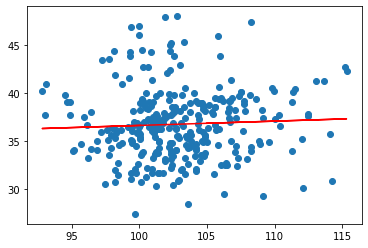

In [21]:
labpro = five_df['Labor productivity (2012=100)']
sal = five_df['Real hourly labor compensation cost ($/hour)']

slope, intercept, rvalue, pvalue, stderr = linregress(labpro, sal)
regress = labpro * slope + intercept

plt.scatter(labpro, sal)
plt.plot(labpro, regress, 'r-')

In [22]:
df_data = df_data[df_data['Year'].isin(five_list)]
df_data = df_data.loc[df_data['State'] != 'District of Columbia', :]
df_data.sort_values(['Real hourly labor compensation cost ($/hour)', 'Labor productivity (percent change)'], ascending = False)

NameError: name 'df_data' is not defined